<div class="text-warning">
    <div class="text-center">
        <div class="h1">practise 3 - house price divar</div>
        <div class="h5">maktabkhooneh</div>
    </div>
    <div class="h4">Name: Amir Mohammad Arghavany</div>
    <div class="h4">Email: amir.arghavoon@gmail.com</div>
</div>

# import packages

In [1]:
# base
import numpy as np
import pandas as pd
# check database & model
from pycaret.regression import *
# EDA
from ydata_profiling import ProfileReport
# visualization
import seaborn as sns
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline
# preprocessing
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import re
# split train & test
from sklearn.model_selection import train_test_split
# parameters tracking
# import wandb
# wandb.login()
# hyper parameters
from sklearn.model_selection import GridSearchCV, KFold
# learning
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
# metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, precision_score, confusion_matrix
# feature importance
import shap
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
# save model
import joblib

# load dateset

In [2]:
df = pd.read_csv(r'D:\DRIVER\LEARNING\OUT OF UNIVERSITY\ML\Quize\ML PRACTICAL\Q3 - house price divar\tehranhouses.csv')
df.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
1313,160,3,True,True,True,Kamranieh,13120000000,437333.33
471,160,2,True,True,True,Pardis,1930000000,64333.33
2304,62,1,True,False,True,Ostad Moein,1440000000,48000.00
721,58,1,True,True,True,North Program Organization,2750000000,91666.67
1778,155,3,True,True,True,Pasdaran,13175000000,439166.67


In [3]:
# drop unusefull data
df.drop('Price(USD)', inplace=True, axis=1)

# check database & model

In [4]:
pycaret_setup = setup(df, target='Price', session_id=999, use_gpu=True, profile=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves 

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

,Description,Value
0,Session id,999
1,Target,Price
2,Target type,Regression
3,Original data shape,"(3479, 7)"
4,Transformed data shape,"(3479, 7)"
5,Transformed train set shape,"(2435, 7)"
6,Transformed test set shape,"(1044, 7)"
7,Numeric features,1
8,Categorical features,2
9,Rows with missing values,0.7%


Loading profile... Please Wait!
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped tra

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) UHD Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more 

In [5]:
# approximate best model & accuracy
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1841989262.4337,30626553681668661248.0000,5243365328.0399,0.5627,0.5221,0.5175,0.2870
xgboost,Extreme Gradient Boosting,1753252930.4283,32104612223088693248.0000,5388093845.6302,0.5369,0.4877,0.4351,0.4160
et,Extra Trees Regressor,1824806328.3212,31947716851669561344.0000,5406335342.4611,0.5363,0.5069,0.4697,0.4220
rf,Random Forest Regressor,1812299471.2226,34187965898160312320.0000,5565361349.8012,0.5093,0.4969,0.4579,0.3730
lightgbm,Light Gradient Boosting Machine,1859041286.9092,33493806290218135552.0000,5607321755.2205,0.5026,0.5011,0.4655,1.5890
lar,Least Angle Regression,2933354140.3070,36613378449461157888.0000,5853437512.1775,0.4589,1.0059,1.3123,0.0570
llar,Lasso Least Angle Regression,2933354140.1067,36613378452957868032.0000,5853437512.4177,0.4589,1.0059,1.3123,0.0530
lr,Linear Regression,2933354139.1127,36613377776175816704.0000,5853437453.5940,0.4589,1.0059,1.3123,0.0950
ridge,Ridge Regression,2933289516.9744,36615591285698109440.0000,5853594049.7862,0.4589,1.0079,1.3122,0.0560
lasso,Lasso Regression,2933354140.1067,36613378452957868032.0000,5853437512.4177,0.4589,1.0059,1.3123,0.0840


GradientBoostingRegressor(random_state=999)

# EDA

In [6]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df2 = df.copy()
df2.loc[:, "Price"] =df["Price"].map('{:,.0f}'.format)

print('='*55, '[check] categorical data & type')
print(df.info())

print('='*55, ['check null data'])
print(df.isna().sum())

print('='*55, 'unique values of every column')
print(df.nunique())

print('='*55, '[check] imbalenced data')
for i in df.columns:
    print('-'*45, i)
    print(df2[i].value_counts())

print('='*55, '[check] scaling')
print(df.describe())

======================================================= [check] categorical data & type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area       3479 non-null   object
 1   Room       3479 non-null   int64 
 2   Parking    3479 non-null   bool  
 3   Warehouse  3479 non-null   bool  
 4   Elevator   3479 non-null   bool  
 5   Address    3456 non-null   object
 6   Price      3479 non-null   int64 
dtypes: bool(3), int64(2), object(2)
memory usage: 119.0+ KB
None
======================================================= ['check null data']
Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address      23
Price         0
dtype: int64
======================================================= unique values of every column
Area         243
Room           6
Parking        2
Warehouse      2
Elevator       2
Address      192


In [8]:
# handel Area error
df['Area'] = df['Area'].apply(lambda x: re.sub(',', '', x))
df["Area"] = pd.to_numeric(df["Area"] , errors='coerce')

In [9]:
df2.sample(5)

,Area,Room,Parking,Warehouse,Elevator,Address,Price
1134,123,3,True,True,True,Nezamabad,"3,300,000,000"
1455,53,1,True,True,False,East Ferdows Boulevard,"1,920,000,000"
3333,145,3,True,True,True,Shahrake Gharb,"10,500,000,000"
3204,67,1,True,True,True,Jordan,"6,700,000,000"
145,70,2,False,True,True,Elm-o-Sanat,"1,800,000,000"


In [10]:
# [check] outlier data
df2.pivot_table(values=['Area', 'Price'], index=['Room', 'Parking', 'Warehouse', 'Elevator'],
              aggfunc=['max', 'mean', 'min'])

max                    min                
                                Area           Price   Area           Price
Room Parking Warehouse Elevator                                            
0    False   False     False     630  75,600,000,000     40     165,000,000
             True      False      43     650,000,000     30     360,000,000
     True    True      True       50     345,000,000    110     102,000,000
1    False   False     False      96     950,000,000    120   1,000,000,000
                       True       88     900,000,000     41   1,100,000,000
             True      False      90     980,000,000    102   1,000,000,000
                       True       80     999,000,000     32   1,000,000,000
     True    False     False      63     835,000,000    400   1,200,000,000
                       True       75     990,000,000     39   1,000,000,000
             True      False      73     995,000,000    130   1,030,000,000
                       True       99     990,000,000    110   1,100,000,000
2    False   False     False      98     950,000,000    100   1,090,000,000
                       True       97     810,000,000     57   1,265,000,000
             True      False      98     950,000,000    100   1,000,000,000
                       True       95   9,500,000,000    100   1,000,000,000
     True    False     False      78     550,000,000    110   2,200,000,000
                       True       97     990,000,000    100   1,100,000,000
             True      False      98     980,000,000  1,000   1,000,000,000
                       True       99     990,000,000    100   1,000,000,000
3    False   False     False      83  27,000,000,000    133   1,286,500,000
                       True       88     560,000,000    102   4,300,000,000
             True      False      63     910,000,000    130   1,450,000,000
                       True       88   6,900,000,000    115   1,300,000,000
     True    False     False     450   6,500,000,000    125   3,850,000,000
                       True       96   8,700,000,000    120   1,145,000,000
             True      False     900   9,238,000,000    105   1,000,000,000
                       True       99     980,000,000    100   1,000,000,000
4    False   False     False     130   6,200,000,000    130   6,200,000,000
     True    False     True      122   2,420,000,000    122   2,400,000,000
             True      False      65   8,500,000,000    133  12,000,000,000
                       True      530  92,400,000,000    145  11,385,000,000
5    False   False     False     320   5,000,000,000    133  12,000,000,000
                       True       58     295,000,000     58     295,000,000
     True    False     False     403   6,500,000,000    220  13,000,000,000
             True      False     929  91,000,000,000    150  10,700,000,000
                       True      750  75,000,000,000    245  14,500,000,000

In [11]:
# distribution of features
for i in ['Parking', 'Warehouse', 'Elevator']:
    print('-'*45, f'{i} - Room')
    print(pd.crosstab(df[i], df['Room']))

--------------------------------------------- Parking - Room
Room     0    1     2    3   4   5
Parking                           
False    8  245   244   26   1   5
True     2  428  1717  706  69  28
--------------------------------------------- Warehouse - Room
Room       0    1     2    3   4   5
Warehouse                           
False      5  110   151   21   3   7
True       5  563  1810  711  67  26
--------------------------------------------- Elevator - Room
Room      0    1     2    3   4   5
Elevator                           
False     8  285   354   49  17  27
True      2  388  1607  683  53   6


# remove outliers

200    40
180    20
190    14
175    14
220    12
300    11
210    10
235     9
250     7
400     7
Name: Area, dtype: int64


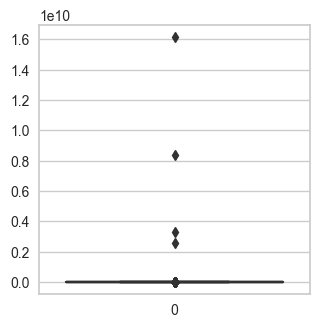

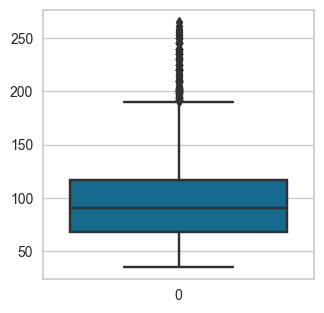

In [12]:
# value_count outlires
print(df['Area'][(df['Area']>170)].value_counts().sort_values(ascending=False).head(10))

# plot befor changes
sns.boxplot(df['Area']).figure.set_size_inches(3.5, 3.5)
plt.show()

# thresold method
lower_limit, upper_limit = df['Area'].quantile([0.001, 0.973])

# plot after changes
dfp = df[(df['Area']>lower_limit) & (df['Area']<upper_limit)]   # preprocessed dataframe
sns.boxplot(dfp['Area']).figure.set_size_inches(3.5, 3.5)

# visualization

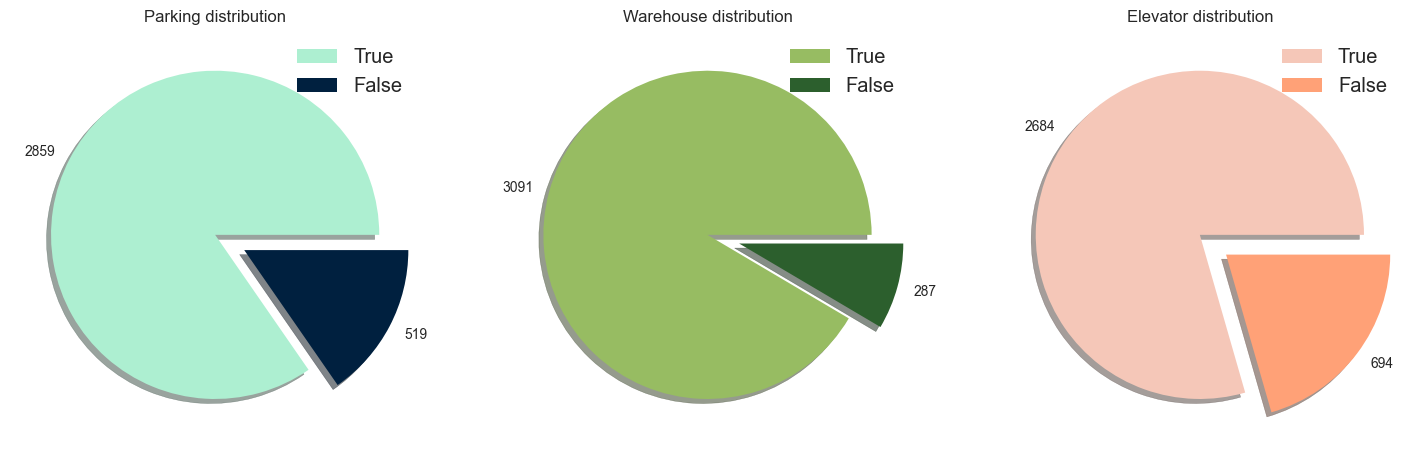

In [13]:
# categorical distribution data
fig, ax = plt.subplots(ncols=3, figsize=(18,6))

colors = [['#ADEFD1FF', '#00203FFF'], ['#97BC62FF', '#2C5F2D'], ['#F5C7B8FF', '#FFA177FF']]
explode = [0, 0.2]
columns = ['Parking', 'Warehouse', 'Elevator']
for i in range(3):
        data = dfp[columns[i]].value_counts()
        ax[i].pie(data, labels=data.values, explode=explode, colors=colors[i], shadow=True)
        ax[i].legend(labels=data.index, fontsize='large')
        ax[i].set_title('{} distribution'.format(columns[i]))

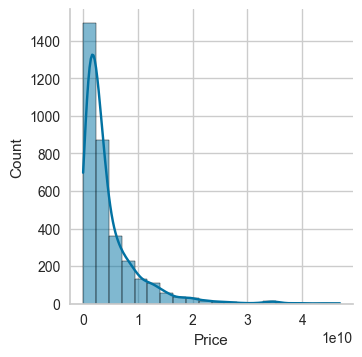

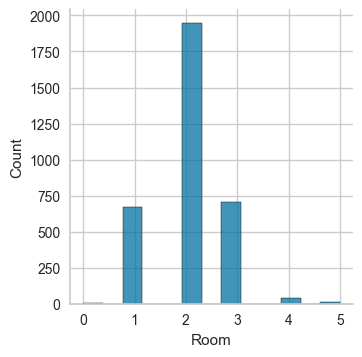

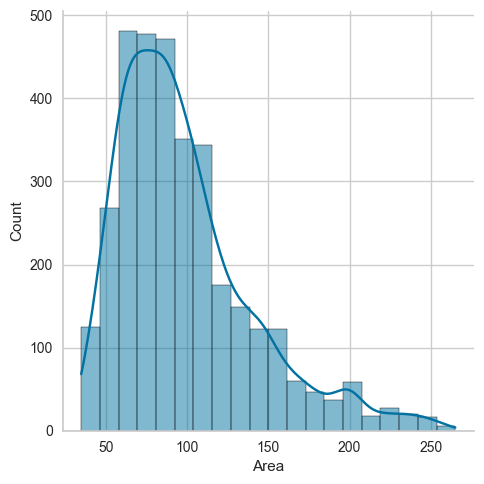

In [14]:
# numerical distribution data
sns.displot(dfp['Price'] , bins=20 , kde=True).figure.set_size_inches(3.5, 3.5)
sns.displot(dfp['Room']).figure.set_size_inches(3.5, 3.5)
sns.displot(dfp['Area'], bins=20, kde=True)

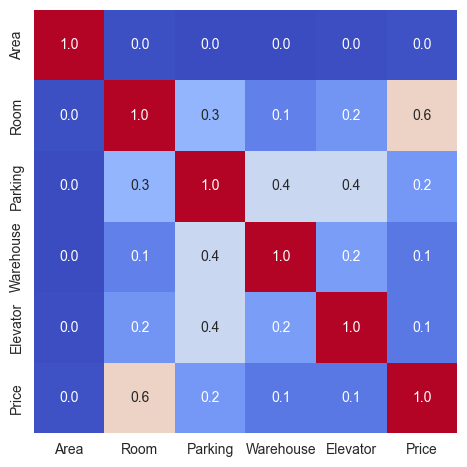

In [15]:
# correlation
corr = df.corr()
sns.heatmap(corr, square=True, fmt='.1f', annot=True, annot_kws={'size': 10}, cmap='coolwarm', cbar=False)
plt.show()

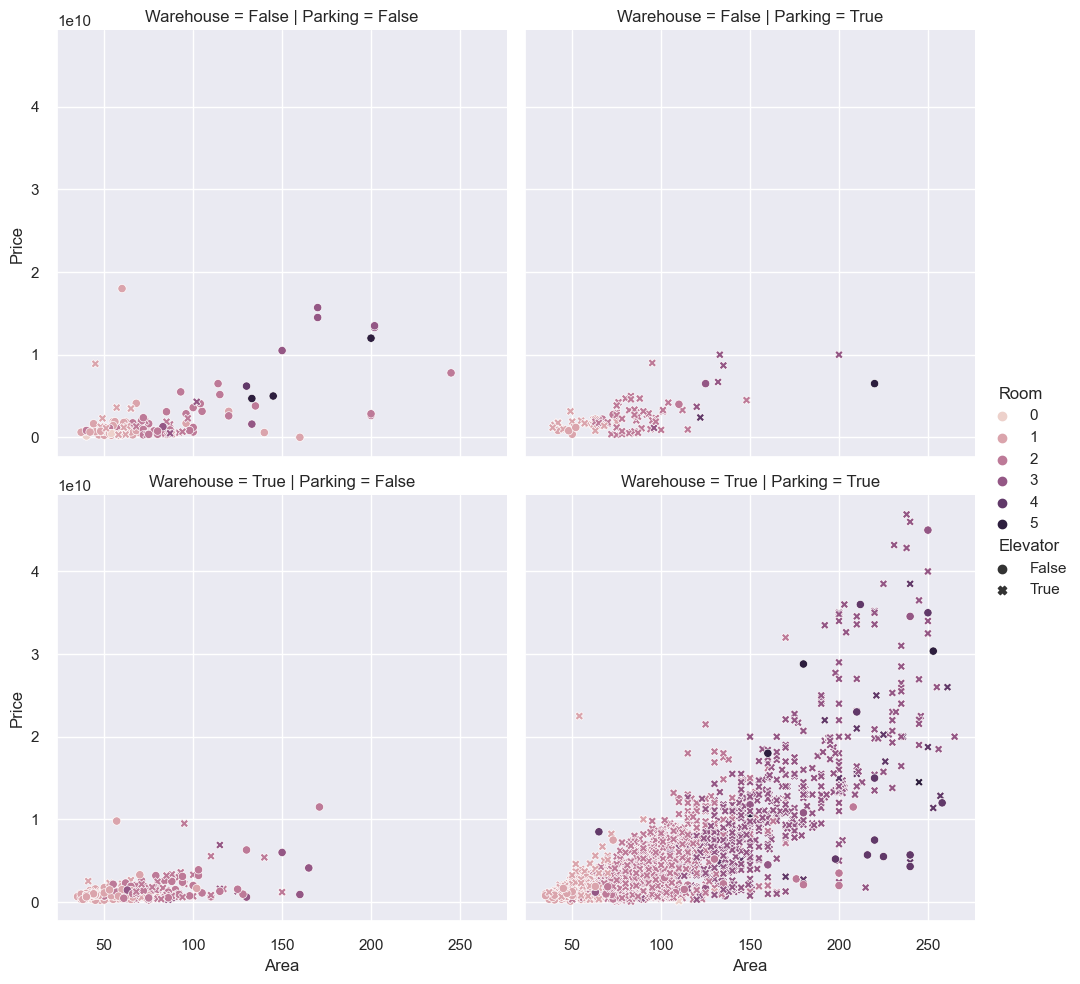

In [16]:
# relational plot
sns.set_theme(style='darkgrid')
sns.relplot(x='Area', y='Price', data=dfp, hue='Room', style='Elevator', col='Parking', row='Warehouse')

# shap

In [17]:
# create model for shap
pycaret_lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1555648444.1454,16690909238289440768.0000,4085450922.2715,0.6557,0.5051,0.4957
1,2290279510.7881,63957018338204770304.0000,7997313194.9552,0.3590,0.5239,0.4272
2,2191631082.9772,39813282316530745344.0000,6309776724.7765,0.4928,0.4735,0.3690
3,1705105557.5303,41059150484214841344.0000,6407741449.5448,0.3672,0.5797,0.9017
4,1872455380.8736,50582647780133363712.0000,7112147902.0148,0.3991,0.4962,0.3452
5,1768461255.6841,21919692723572166656.0000,4681847148.6767,0.6229,0.4573,0.3996
6,1974942890.2714,46756821636796219392.0000,6837895994.8800,0.4129,0.5344,0.4644
7,1673457645.7565,13744920178572894208.0000,3707414217.2912,0.5953,0.5383,0.4909
8,1890332206.6705,24711273930084093952.0000,4971043545.3820,0.5536,0.4956,0.4387


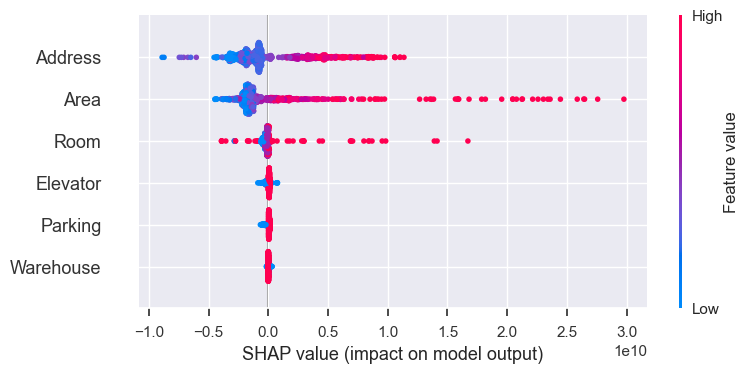

In [18]:
# distribution of features
interpret_model(pycaret_lgbm)

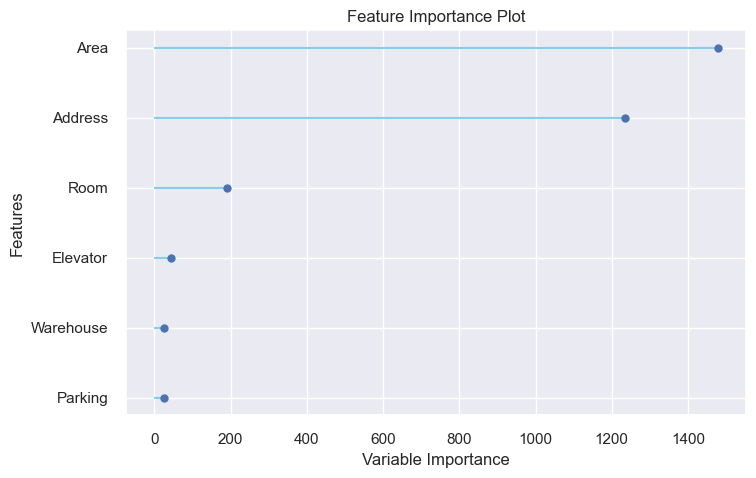

In [19]:
# feature importance
plot_model(estimator=pycaret_lgbm, plot='feature')

# review features

In [20]:
# drop unuseful features
''' if we recheck shap [[feature_importnace + correlation + value_count]] we can realise that
    all of them says that Parking and Warehouse is not important feature for train and also
    [[sns relplot]] says that we have bad distribution of these features (most of the data is in 
    Paking=True & Warehouse=True) -> !imbalanced data! -> {so i dropped these features}
    of course it make ✕less accuracy✕ but we can have √√less question of our users√√
'''
dfp.drop(['Parking', 'Warehouse'], inplace=True, axis=1)
dfp.sample(4)

,Area,Room,Elevator,Address,Price
2662,60,1,True,Parand,390000000
1441,145,3,True,Heravi,9000000000
1239,133,3,False,Andisheh,1600000000
674,58,1,False,Punak,1900000000


# preprocessing

In [21]:
# null values
dfp.dropna(inplace=True)

In [22]:
# boolian to numerical
dfp['Elevator'] = dfp['Elevator'].astype('int64')

In [23]:
# categorical to numerical
dfp = df.merge(pd.get_dummies(dfp['Address']), left_index = True, right_index = True)
dfp.drop(columns = 'Address', inplace = True)

# train & test

In [24]:
Y = dfp['Price']
X = dfp.drop(['Price'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

# scaling

In [25]:
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(sc.transform(X_test), columns=X.columns)

# hyper parameters

In [26]:
# search function for best parameters + score
def parameter_finder (model, parameters={}):
    grid = GridSearchCV(model, 
                        param_grid = parameters, 
                        refit = True, 
                        cv = KFold(shuffle = True, random_state = 1), 
                        n_jobs = -1)
    grid_fit = grid.fit(X_train, Y_train)
    Y_train_pred = grid_fit.predict(X_train)
    Y_pred = grid_fit.predict(X_test)
    train_score =r2_score(Y_train_pred, Y_train)
    test_score = r2_score(Y_pred, Y_test)
    RMSE = np.sqrt(mean_squared_error(Y_test, Y_pred))
    model_name = str(model).split('(')[0]
    print('='*45, model_name)
    print(f'best param: {grid_fit.best_params_}')
    print(f'R2 score (train): {train_score}')
    print(f'R2 score (test): {test_score}')
    print(f'RSME score: {RMSE:,}')

In [27]:
# Gradient Boosting Regressor hyper parameters + score
gbr = GradientBoostingRegressor()
param = {
    'learning_rate': [0.05, 0.1],
    'criterion': ['squared_error'],
    'n_estimators': [400],
    'random_state': [42],
    'max_depth': [2, 3]
}
parameter_finder(gbr, param)

============================================= GradientBoostingRegressor
best param: {'criterion': 'squared_error', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400, 'random_state': 42}
R2 score (train): 0.9262833395854444
R2 score (test): 0.8062676339047342
RSME score: 2,002,266,160.506472


In [28]:
# Random Forest Regressor hyper parameters + score
rfr = RandomForestRegressor()
param = {
    'criterion': ['squared_error'],
    'n_estimators': [100, 200],
    'random_state': [42],
}
parameter_finder(rfr, param)

============================================= RandomForestRegressor
best param: {'criterion': 'squared_error', 'n_estimators': 200, 'random_state': 42}
R2 score (train): 0.9594855323529703
R2 score (test): 0.7466200828991711
RSME score: 2,272,117,592.9752517


In [29]:
# XGBoost Regressor hyper parameters + score
xgbr = XGBRegressor()
param = {
    'n_estimators': [100,300],
     'learning_rate': [0.1,0.05],
     'subsample': [0.75],
     'colsample_bytree': [1],
     'max_depth': [3,4],
     'gamma': [0]
}
parameter_finder(xgbr, param)

============================================= XGBRegressor
best param: {'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.75}
R2 score (train): 0.9147628932893839
R2 score (test): 0.7934798188294918
RSME score: 2,059,381,524.2698627


# ML

In [30]:
gbr = GradientBoostingRegressor(criterion='squared_error', learning_rate=0.1, max_depth=3, n_estimators=400, random_state=999)
gbr.fit(X_train , Y_train)

GradientBoostingRegressor(criterion='squared_error', n_estimators=400,
                          random_state=999)

# metrics

In [31]:
# error
def metrics_score_ml(Y, Y_pred):
    return [
            mean_absolute_error(Y, Y_pred),
            mean_squared_error(Y, Y_pred),
            np.sqrt(mean_squared_error(Y, Y_pred)),
            r2_score(Y, Y_pred)
           ]
data = [
    metrics_score_ml(Y_train, gbr.predict(X_train)),
    metrics_score_ml(Y_test, gbr.predict(X_test))
]
pd.DataFrame(data, columns=['MAE', 'MSE', 'RMSE', 'r2'], index=['train', 'test'])

,MAE,MSE,RMSE,r2
train,7.882946e+08,1.942709e+18,1.393811e+09,0.935128
test,1.016500e+09,3.998858e+18,1.999714e+09,0.856802


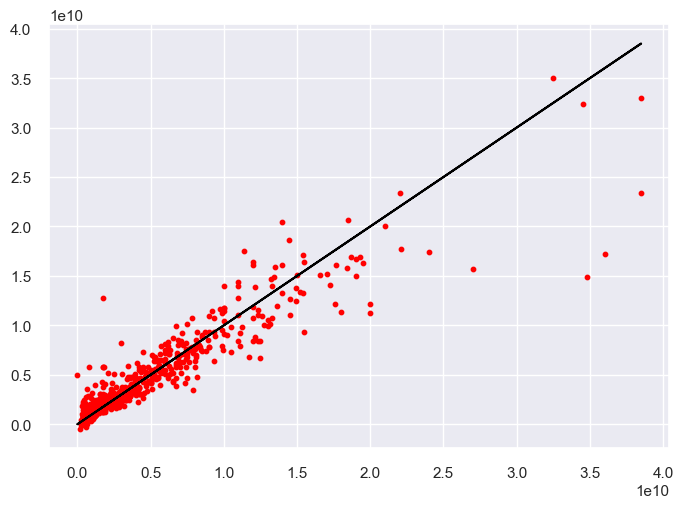

In [33]:
# error plot
plt.scatter(Y_test, gbr.predict(X_test), c='red', s=10)
plt.plot(Y_test, Y_test, c='black')
plt.show()

# save model

In [ ]:
# joblib.dump(gbr, 'house_price_divar_GBR.joblib')